In [191]:
??dmet_2d

is in ipython: 1


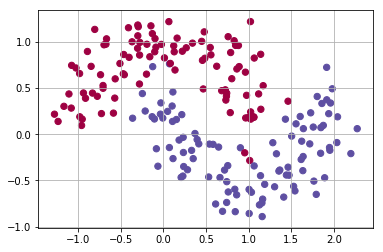

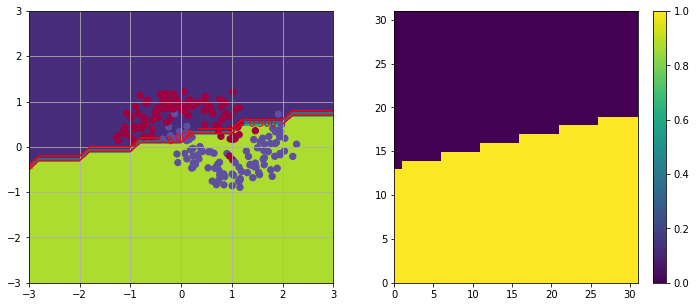

In [3]:
import sklearn.datasets
import sklearn.linear_model
import util
reload(util)
from util import *

import vis_util 
reload(vis_util)
from vis_util import *

from surfer import *

np.random.seed(3) 
X, y = sklearn.datasets.make_moons(200, noise=0.20) 
# with open('tofit.npy','w') as f:

data = {'input':X,'output':y}
np.save('tofit.npy',data,)
def data_scatter(X):
    plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
data_scatter(X)
plt.grid()
plt.show()
 
    
def view_model(m,axs = None,obs=None,**kwargs):
    if axs is None:
        fig,axs =plt.subplots(1,2,figsize = [12,5])
    plt.sca(axs[0])
    zs,xs,ys = dmet_2d( util.f_2d(m.predict,transpose=1),span=[-3,3],levels=np.linspace(0,1,5),**kwargs);
    data_scatter(obs['input'])
    plt.sca(axs[1])
    plt.pcolormesh(zs)
    plt.colorbar()

    return axs
    

# %% 3 
# Train the logistic rgeression classifier 
clf = sklearn.linear_model.LogisticRegressionCV() 
clf.fit(X, y) 

view_model(clf,obs=data)
plt.show()
obs = [X,y]

/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


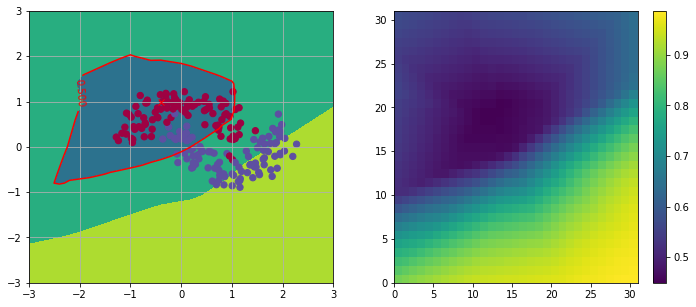

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import keras
import keras.layers as KL
import keras.optimizers as KO

# m = keras.models.Sequential()
x = KL.Input(shape=(2,))
input_layer = x
# x = KL.Dense(4)(x)
# x = KL.Activation('relu',name = 'hidden-activation',)(x)
nH = 3
for i in range(nH):
    x = KL.Dense(6)(x)
    x = KL.Activation('relu',)(x)
#     x = KL.Activation('sigmoid',)(x)

x = KL.Dense(1)(x)
x = KL.Activation('sigmoid',name = 'sigmoid')(x)
output_layer = x
m = keras.models.Model(input_layer,output_layer)
# m.summary()
# optim = keras.optimizers.sgd()
optim = keras.optimizers.adagrad()
m.compile(loss=keras.losses.binary_crossentropy, optimizer=optim
#           ,metrics=['loss']
         )
m1 = m
# hist = m1.fit(*obs,batch_size=len(X), nb_epoch = 10)
hist = m1.fit(obs[0],obs[1],batch_size=len(obs[0]), epochs = 50,verbose=0)
# hist = m1.fit(obs[0],obs[1], epochs = 10)
axs = view_model(m,obs=data)
plt.show()

fname = 'totest.hdf5'
# m1.save(fname)
m.save(fname)
# fname = 'totest.hdf5'
# m1.save(fname)

In [5]:
W = m.get_weights()
SHAPE = [(e.size,e.shape) for e in W]
SHAPE =zip(*SHAPE)


In [6]:
from util_nn import *

# normalization
l2_norm = lambda x: np.mean(np.square(x),axis=-1)

W = m.get_weights()
SHAPE = [(e.size,e.shape) for e in W]
SHAPE =zip(*SHAPE)
def weight2flat(W):
    flat = np.hstack([np.ravel(x) for x in W])
    return flat
m.gradF = make_gradient_function(m)
# print SHAPE
idx = np.cumsum(SHAPE[0])
D = idx[-1]
SHAPE_idx = idx[:-1]
# def 

flat2weight = lambda flat:[np.reshape( x, SHAPE[1][i] ) for i,x in enumerate(np.split(flat,SHAPE_idx))]
# const = 0.01
# const = 1
# const = 0.  ### log(1)
const = .1
def flat2loss(*flat):
    Wout = flat2weight(flat)
#     Wout = [np.reshape( x, SHAPE[1][i] ) for i,x in enumerate(np.split(flat,idx))]
    m.set_weights(Wout)
    loss = m.evaluate(data['input'],data['output'],verbose=0)
    loss += const * (l2_normF(lambda x:x)(flat))
#     loss += np.square(np.log(l2_norm(flat)) - const)
    return loss
def gradF(*flat):
    Wout = flat2weight(flat)
#     Wout = [np.reshape( x, SHAPE[1][i] ) for i,x in enumerate(np.split(flat,idx))]
    m.set_weights(Wout)
    grad = get_gradients(data,gradF=m.gradF)
    grad = weight2flat(grad)
#     print Wout.shape
#     grad = np.add(grad, np.multiply(2 *const, flat)/len(flat))
    dgrad = np.multiply(2 *const, flat)/len(flat)
#     norm = l2_norm(flat)
#     dgrad = 4*(np.log(norm)-const) / norm /len(flat) * np.array(flat)
    grad = np.add(grad, dgrad)
    return grad

h = flat2loss

CPU times: user 64 ms, sys: 12 ms, total: 76 ms
Wall time: 71.2 ms
CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 25.5 ms


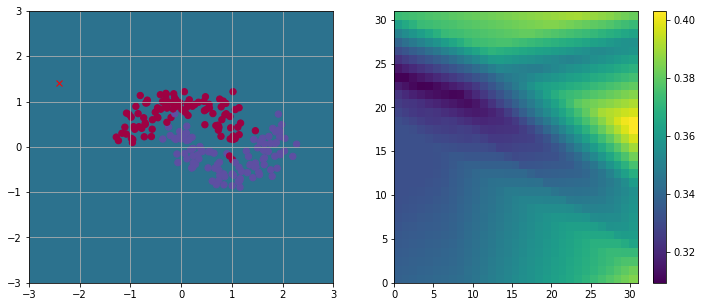

In [7]:
np.random.seed(0)
reset_weights(m)
x = (np.random.random(weight2flat(W).shape) - 0.5 )*2
# x = weight2flat(m.get_weights())
v = (np.random.random(x.shape) - 0.5 )*0.1
x0 = np.hstack([x,v])

h = flat2loss
g = make_gradF(h)
%time h(*x0[:D])
%time gradF(*x0[:D])

view_model(m,obs=data)
x = x0
plt.show()
# %time g(*x0[:D])
# flat2loss()
# flat2loss
# np.reshape(s,shape)

In [ ]:
# x = X[-1]

In [8]:
from pymisca.proba import *
gradF(*x[:D])

array([-6.57104966e-03, -8.44852848e-03,  1.04605353e-04,  1.64708928e-04,
       -2.80165874e-04, -4.06825431e-02,  3.12718920e-03,  9.04990280e-03,
       -1.51637148e-03, -4.27737546e-04,  1.07055060e-03,  2.09784412e-02,
        1.07655623e-02,  2.45783237e-02, -4.61649241e-03, -1.51512184e-03,
       -1.76066643e-03, -3.51393127e-02,  1.02075872e-03,  1.35784275e-03,
        4.95960864e-04,  2.23679345e-03, -1.15407727e-02,  1.02946487e-03,
       -1.40082779e-03,  5.13471638e-04, -4.16912229e-03,  2.50645982e-02,
       -2.96666215e-02, -3.13167193e-04, -8.64016102e-04,  1.00636216e-03,
       -1.60916212e-04,  1.84694440e-03, -1.09222575e-03,  4.31689898e-04,
        4.11360450e-04,  4.29115585e-04,  1.62843332e-03,  6.67230455e-04,
       -5.15567337e-04, -2.31075399e-04,  7.25252095e-04, -1.61385148e-03,
        6.11987947e-04,  6.26194017e-04, -1.06281629e-03, -1.36173836e-03,
       -6.77327153e-04, -5.00143960e-04, -3.35350825e-03,  1.32113185e-02,
       -3.18416827e-02, -

In [345]:
X=[x]

Start: 1.3402407440557524
Final: 0.9472873858534898


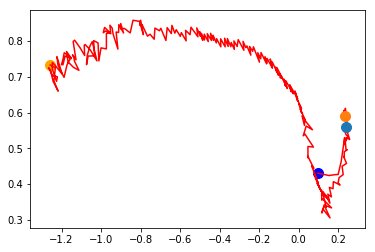

1.8737839502857767


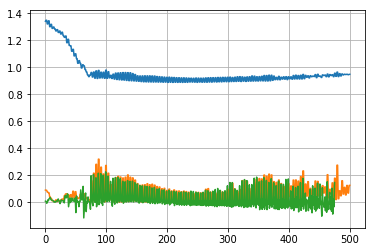

point: 0.9472873858534898


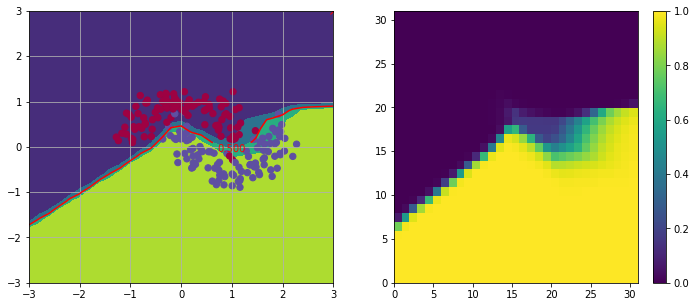

In [39]:
try:
    dmet_2d(make_gradF(h),span=[-3,3],bins=60)
    plt.show()
except:
    pass
# x = (1.6,1.2,0.0005,0.0205)
# h = gauss_well
# x = (.1,-.1,0.0005,0.0205)
# cst = lambda *args:10
# adv = make_surfer(prodF(h,cst),x,D=D,gradF = prodF(gradF,cst))
vn = 0.050
vt = 0.15
adv = make_surfer(h,x,D=D,vt=vt,vn = vn,lr=1.25,
                  fix=0,
                 gradF=gradF)
# adv = make_surfer(h,x,D=D,gradF = gradF)
# x = x0
# adv = make_adv_descent(h,D=D,gradF=gradF)
# gradF = make_gradF(h)    
X = [x]
X = forward(x,500,adv=adv)
try:
    dmet_2d(h,span=[-4,4])
except:
    pass
print 'Start:',h(*X[0][:D])
print 'Final:',h(*X[-1][:D])
traj_2D(X,ax=plt.gca())
# pt = X[len(X)//2]
# add_point(pt)
add_point(X[20])
add_point(X[40])
plt.show()
print l1_normF(gradF)(*X[-1][:D])

X0 = X

gds = map(combine_args(gradF),X[:,:D])
objs = map(combine_args(h),X[:,:D])
# gds = map(combine_args(gradF),X[:,:3])
gds = np.array(gds)
gds_l2sq = np.sum(np.square(gds),axis=-1)
dT = 25
switch = np.sum(gds[dT:] * gds[:-dT],axis=-1)
plt.plot(objs)
plt.plot(gds_l2sq)
plt.plot(switch)
plt.grid()
plt.show()

# add_point(X)
pt = X[-1]
print 'point:',h(*pt[:D])
h(*pt[:D])
view_model(m,obs=data)
plt.show()

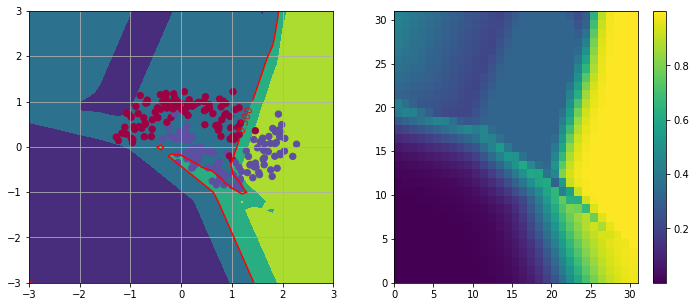

In [42]:
x = X[50]
h(*x[:D])
view_model(m,obs=data)
plt.show()

In [7]:
x = X[-1]

In [31]:
try:
    dmet_2d(make_gradF(h),span=[-3,3],bins=60)
    plt.show()
except:
    pass

vn = 0.015
adv = make_surfer(h,x,D=D,vt=0.150,vn = vn,lr=1.25,
                  fix=0,
                 gradF=gradF,
                 mask = mask)

adv = make_adv_descent(h,D=D,gradF=gradF)
# gradF = make_gradF(h)    
X = [x]
X = forward(x,500,adv=adv)
try:
    dmet_2d(h,span=[-4,4])
except:
    pass
print 'Start:',h(*X[0][:D])
print 'Final:',h(*X[-1][:D])
traj_2D(X,ax=plt.gca())
# pt = X[len(X)//2]
# add_point(pt)
add_point(X[20])
add_point(X[40])
plt.show()
print l1_normF(gradF)(*X[-1][:D])

X0 = X

gds = map(combine_args(gradF),X[:,:D])
objs = map(combine_args(h),X[:,:D])
# gds = map(combine_args(gradF),X[:,:3])
gds = np.array(gds)
gds_l2sq = np.sum(np.square(gds),axis=-1)
dT = 25
switch = np.sum(gds[dT:] * gds[:-dT],axis=-1)
plt.plot(objs)
plt.plot(gds_l2sq)
plt.plot(switch)
plt.grid()
plt.show()

# add_point(X)
pt = X[-1]
print 'point:',h(*pt[:D])
h(*pt[:D])
view_model(m,obs=data)
plt.show()

NameError: name 'mask' is not defined

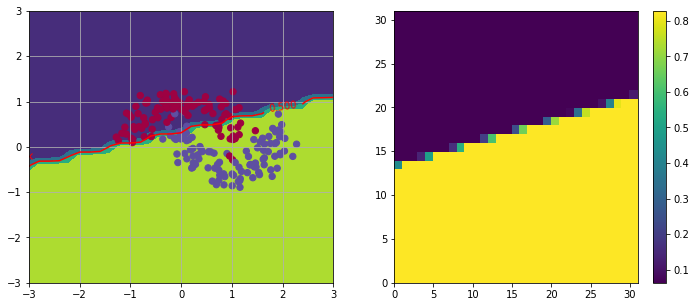

In [1526]:
x = X[-1]
h(*x[:D])
view_model(m,obs=data)
plt.show()

In [43]:
x = X[-1]

In [564]:
X = [x]

In [1316]:
??h

In [44]:
lst = []

In [1494]:
# X= [lst_logL2[-1]]
X = lst[-6]

In [1524]:
f0 = 100.
# f0 = 2.2
# f0 = 2.0
f0 = 0.
f0 = 1.1
# f0  = 0.8
# f0 = 2.6
# f0 = 0.05
print 'f0:',f0
try:
    dmet_2d(make_gradF(h),span=[-3,3],bins=60)
    plt.show()
except:
    pass
# x = (1.6,1.2,0.0005,0.0205)
# h = gauss_well
# x = (.1,-.1,0.0005,0.0205)
for i in range(5):
    x = X[-1]
    cst = lambda *args:10
    adv = make_surfer(
#         h,x,D=D,gradF = gradF,f0=f0,fix=1,vn = 1.85,vt=0.12,lr=0.25,
        h,x,D=D,gradF = gradF,f0=f0,fix=1,vn = 0.15,vt=0.48,lr=0.5,
#         h,x,D=D,gradF = gradF,f0=f0,fix=1,vn = 0.15,vt=0.22,lr=0.25,
#     adv = make_surfer(h,x,D=D,gradF = gradF,f0=f0,fix=1,vn = 0.12,vt=0.06,lr=0.5,
                     mask = mask
#                      mask=None
                     )
    X = [x]
    X = forward(x,200,adv=adv)
    try:
        dmet_2d(h,span=[-4,4])
    except:
        pass
    print 'i:',i
    print 'Start:',h(*X[0][:D])
    print 'Final:',h(*X[-1][:D])
    lst.append(X)
print 'finished'

f0: 1.1
i: 0
Start: 1.099409119595709
Final: 1.0700389668834616
i: 1
Start: 1.0700389668834616
Final: 1.0935208085159074
i: 2
Start: 1.0935208085159074
Final: 1.0478455764964048
i: 3
Start: 1.0478455764964048
Final: 1.0605171788403724
i: 4
Start: 1.0605171788403724
Final: 1.0271780063787823
finished


In [1534]:
SHAPE

[(12, 6, 36, 6, 36, 6, 6, 1),
 ((2, 6), (6,), (6, 6), (6,), (6, 6), (6,), (6, 1), (1,))]

In [1532]:
flat2weight(X[-1][:D])[-4:]

[array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , -1.78195061,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]]),
 array([0.        , 2.01415194, 0.        , 0.        , 0.        ,
        0.        ]),
 array([[ 0.        ],
        [-2.11420343],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]),
 array([1.56730788])]

In [1527]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 18        
_________________________________________________________________
activation_13 (Activation)   (None, 6)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 42        
_________________________________________________________________
activation_14 (Activation)   (None, 6)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 42        
_________________________________________________________________
activation_15 (Activation)   (None, 6)                 0         
__________

In [1353]:
X=[lst[-6][-1]]

In [905]:
arr = lst_logL2
x = arr[-1].copy()
X = [x]

In [1222]:
# idx
mask = reset_mask(x)

In [1510]:
x = arr[-4].copy()

idx = (x**2) > 0.2**2
print idx.sum()

12


In [1495]:
arr = np.vstack(X)

In [1511]:
x = arr[-1].copy()
mask = np.ones((D,),np.bool)
idx = (x**2) > 0.2**2
print idx.sum()
mask = mask & idx[:D]
x[:D][~mask]  = 0
X = [x]
print x[:20]
print 'dof:',mask.sum()

11
[ 0.          3.8503353   0.          0.          0.          0.
  0.         -2.51767957  0.          0.          0.          0.
  0.          3.21405626  0.          0.          0.          0.
  0.          0.        ]
dof: 8


In [783]:
mask  =reset_mask(x)

In [1275]:
lst_L2 = arr

In [1313]:
lst_logL2 = arr

In [782]:
def reset_mask(x):
    mask = np.ones(len(x)//2,np.bool)
    return mask

In [1336]:
print x[:D].mean()

-0.11487380379661925


In [1458]:
x = X[-1]
x[D:]=0
noise = (np.random.random(x.size)-0.5)*0.08
x = x + noise
X = [x]

In [1410]:
X = lst_L2

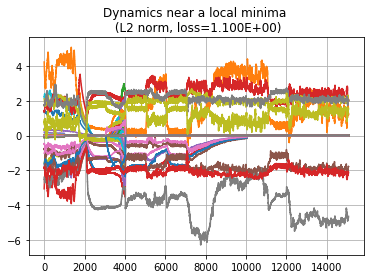

In [1537]:
ax =plt.gca()
# for arr in lst[-10:]:
# arr = np.vstack(lst[-80:-40])
arr = np.vstack(lst[-75:])
# arr = lst_logL2
# arr = arr[-100:]
# arr = np.vstack(lst_logL2)
#     traj_2D(arr[:,5:],ax=ax)
# plt.plot(arr[:,:24])
plt.plot(arr[:,:D])
rad = 0.1
# plt.ylim(-1,1)
# plt.ylim(-rad,rad)
# plt.ylim(-2,2)
# plt.ylim(-2,2)
# plt.ylim(-3,3)

# plt.ylim(3-.2,3+.2)
# plt.savefig('img/f0%.3f.png'%f0)
plt.grid()
plt.title('Dynamics near a local minima \n (L2 norm, loss=%.3E)'%f0)
plt.savefig('img/L2_iterative_pruning.png')
plt.show()

In [1068]:
??h

In [1060]:
h(*X[-1][:D])

2.1507310268000466

In [970]:
def make_surfer(h,x=None,D = None,lr= 1.,gradF=None,f0=None,
                fix = 1,
                vt = 0.05, vn = 0.01,mask = None):
    if f0 is None:
        f0 = h(*x[:D])
    if gradF is None:
        gradF = make_gradF(h)
    def adv(IN,i):
        IN = np.array(IN)
        x0 = IN[:D]
        v0 = IN[D:]
        gd0 = np.add(gradF(*x0) , gradF(*np.add(x0,v0)))/2.
#         print gd0
        f = h(*x0)
        df = f-f0
        if mask is not None:
            x = x0
            v = v0
            gd = gd0
        else:
            x = x0
            v = v0
            gd= gd0
    #     v  = IN[2:]    
    #     df = lr
        s = i%2
        if s==0:       
            dx = np.multiply(lr,v)
            x = np.add(x,dx).tolist()
        elif s==1:
            v = np.array(v)
#             f = h(*np.add(x,0))
            df = f-f0
    #         dv = np.multiply(gd,-df)
            gdgd = np.sqrt(np.dot(gd,gd))
            gdn = gd / gdgd
            
            #### Find orthogonal vector
            dot = np.dot(v,gd) / gdgd**2 *gdn
            vo = v - dot  
            lvo = np.sqrt(np.dot(vo,vo))
    
            vo = vo/lvo*vt #### Constant orthogonal/tangential speed
            if fix:
                dot = gdn * -cmp(df,0)*vn  ##### constant normal speed
            else:
                dot = gdn *-vn  ##### constant normal speed

            v = dot + vo
            v = v.tolist()
            pass
        if mask is not None:
            np.putmask(x0,mask,x)
            np.putmask(v0,mask,v)
#             v0[mask]= v
        else:
            x0=x
            v0=v
        return np.hstack([x0,v0])
#         lst = [x0,v0]
#         return sum(lst,[])
    return adv    

In [972]:
mask = reset_mask(x)

In [794]:
abs(x).mean()

0.25908300546950463

In [1329]:
x = X[-1]
noise = (np.random.random(x.size)-0.5)*0.08
x = x + noise
X = [x]

模型正则化（regularisation）是防止过拟合的常用手段之一，L2和L1正则化因为其形式简单被大量使用。但是L2正则项的不可抹消性(non-eliminatable)是一个值得注意的问题，下面我对L2正则做简单的处理获得一个可抹消的logL2正则。

L2 norm is weird in the sense you have to set all weights to zero to eliminate its effect.
aka 
$$
l2= E(w_i^2) = 0\\
\leftrightarrow w_i = 0 ~~ \forall i
$$

This does not seems to be a desired property, since the optimiser might confuses its objective. A possible improvement is to assert the second moment is a constant K. 

$$
regulariser = metric(E(x^2),K)
$$

The l2 norm translates to K=0 and metric='l1' 

It's natural to consider $K \neq 0$ for common statistical models (It's impossible for your best model to have all-zero parameters, especially in neural networks). Let's use the most common loss first: mse/l2. Then the regulariser reads

$$
r = (E(x^2)-K)^2
$$

But mse is often restrictive and assumes linear deviation in the local vincinty, which generally is not the case  since E(x^2) respond quadratically to change in x. Hence it makes sense to log-transform the soft constraint and this leads to 

$$
r = norm(\log(E(x^2)/K))
$$

here we choose $norm(x)=x^2$ to make the function easily differentiable, and without loss of generality $K=1$

$$
r = (\log(E(x^2)))^2
$$

However we notice this term is not distributive. Hence we can define a distributive counterpartm, which then requires elementwise calculation of $\log$

$$
r = E(\log(x^2)^2)
$$


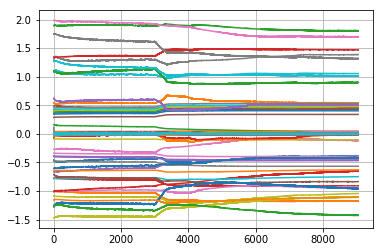

In [88]:
ax =plt.gca()
# for arr in lst[-10:]:
# arr = np.vstack(lst[-80:-40])
arr = np.vstack(lst[-65:-20])
#     traj_2D(arr[:,5:],ax=ax)
# plt.plot(arr[:,:24])
plt.plot(arr[:,24:])
# plt.ylim(-1,1)
# plt.ylim(-2,2)
# plt.savefig('img/f0%.3f.png'%f0)
plt.grid()
plt.show()

In [125]:
from pymisca.proba import *
def make_adv_grandwalk(f,gradF=None,D = None, dt = 0.1, momentum = 0.5):
    '''
    A very bad example of random vector descend
    '''
    if D is None:
        D = f.func_code.co_argcount//2
    if gradF is None:
        gradF = make_gradF(f)
    fbeta = make_fbeta(D=min(max(D,3),6))
    def adv(IN,i):
        x = IN[:D]
        v0 = IN[D:]
        gd = gradF(*x)
        gdl= l2_norm(gd)
#         gdl = np.
        if gdl:
            gdn = np.divide(gd,gdl)     
        else:
            gdn = gd
#         v = radial_randvector(fbeta,D=D,n=1,v0=gdn,E = 1.)
#         v = radial_randvector(fbeta,D=D,n=1,v0=-gdn,E = 1./gdl)
#         v = radial_randvector(fbeta,D=D,n=1,v0=-gdn,E = 1./gdl**2)
        v = radial_randvector(fbeta,D=D,n=1,v0=-gdn,E = np.clip(1./gdl,0.05,10))
#         v = radial_randvector(fbeta,D=D,n=1,v0=-gdn,E = np.clip(1./(gdl/len(gd)),0.1,5))
#         v = np.isnan
        v = (momentum * v0 + v)/(1+momentum)
        x =  np.add(x,np.multiply(v,dt)).ravel()
        OUT = np.hstack([x,np.ravel(v)])
        return OUT 
    return adv

In [75]:

fbeta = make_fbeta(D=max(7,3))
arr = radial_randvector(fbeta,D=7,n=100,v0=None,E = 1.)
np.isnan(arr).mean()

0.0

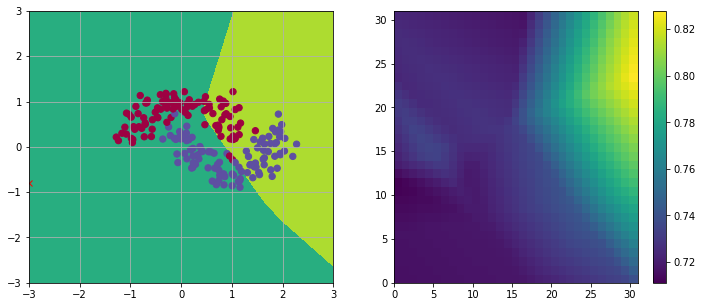

In [177]:
reset_weights(m)
view_model(m,obs=data)
x = weight2flat(m.get_weights())
x = np.hstack([x,x])
plt.show()

Start: 1.2758617032294952
Final: 0.7677717969179314


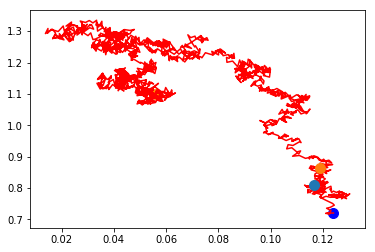

3.652833250953291


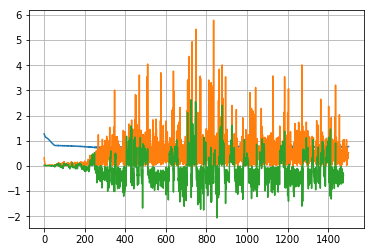

point: 0.7677717969179314


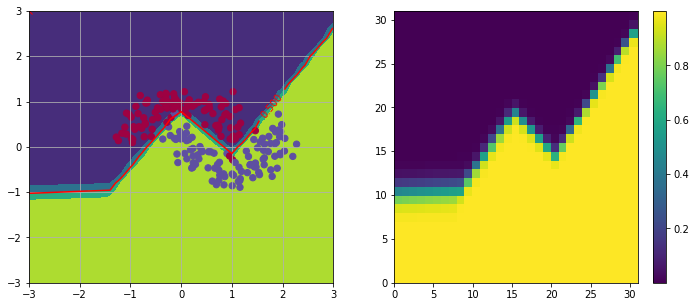

In [185]:
try:
    dmet_2d(make_gradF(h),span=[-3,3],bins=60)
    plt.show()
except:
    pass

vn = 0.015
# adv = make_surfer(h,x,D=D,vt=0.150,vn = vn,lr=1.25,
#                   fix=0,
#                  gradF=gradF,
#                  mask = mask)

# adv = make_adv_descent(h,D=D,gradF=gradF)
# adv = make_adv_grandwalk(h,D=D,gradF=gradF,dt=0.055,momentum=8.)
adv = make_adv_unif(h,D=D,gradF=gradF,alpha= None,dt=0.055,)
# adv = make_
# gradF = make_gradF(h)    
X = [x]
X = forward(x,1500,adv=adv,D=D)
try:
    dmet_2d(h,span=[-4,4])
except:
    pass
print 'Start:',h(*X[0][:D])
print 'Final:',h(*X[-1][:D])
traj_2D(X,ax=plt.gca())
# pt = X[len(X)//2]
# add_point(pt)
add_point(X[20])
add_point(X[40])
plt.show()
print l1_normF(gradF)(*X[-1][:D])

# X0 = X

gds = map(combine_args(gradF),X[:,:D])
objs = map(combine_args(h),X[:,:D])
# gds = map(combine_args(gradF),X[:,:3])
gds = np.array(gds)
gds_l2sq = np.sum(np.square(gds),axis=-1)
dT = 25
switch = np.sum(gds[dT:] * gds[:-dT],axis=-1)
plt.plot(objs)
plt.plot(gds_l2sq)
plt.plot(switch)
plt.grid()
plt.show()

# # add_point(X)
pt = X[-1]
print 'point:',h(*pt[:D])
h(*pt[:D])
view_model(m,obs=data)
plt.show()

In [170]:
from pymisca.proba import *
def unif_vector(MEAN,a=None,size=1):
    '''
    "a" (alpha) is the prior belief of the location of variate
    '''
    L1 = np.abs(MEAN)
    if a is None:
        a = np.mean(L1)
    D = np.size(MEAN)
    x = np.random.random((size,D,))
    b = 2 * L1 - a
    y = x * (b-a) + a
    y = (2*(MEAN>0) - 1) * y
    return y

def make_adv_unif(h,alpha=None,eta=0.0,
                  dt=0.1,D=None,gradF=None):
    '''
    Prepare a descent functional from an objective function
    Samples random gradients from independent uniform distributions, assume h(X)=h(x1,x2,...,xd),
    grad(h) = \nabla_X {h} is the gradient
    then the stochastic gradient G is constructed so that E(G)=grad(h) and Var(G_i) = 1/3*(grad(h)_i - \alpha)^2,
    where \alpha is the prior belief and can be set to E_i(|grad(h)_i|) (l1 norm of the gradient).
    
    '''
    if D is None:
        D = h.func_code.co_argcount
    if gradF is None:
        gradF = make_gradF(h)
    def adv_descent(IN,i):
        x = IN[:D]
        v = IN[D:]
        v = np.array(v)
        if 1:
#         if i%2:            
            gd = gradF(*x)
#            vct = -gamma_vector(MEAN=gd,disper=disper,size=1,rv=rv).ravel()
            gd = gd/l2_norm(gd)
            vct =  -unif_vector(MEAN=gd,
                                a = alpha,size=1).ravel()
            v = (eta * v + vct)/(1.+eta)
#         else:
            x = np.add(x,np.multiply(dt,v))    
        return np.hstack([x,v])
    return adv_descent


In [157]:
# X[-1]
print D
print np.sum(abs(arr[-1][:D])>0.25)

109
52


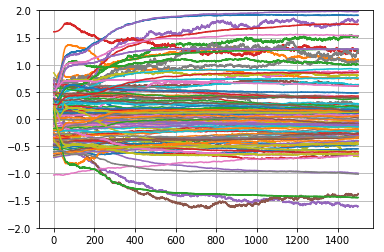

In [190]:
arr =np.vstack(X)
plt.plot(arr[:,:D])
rd = 2.
plt.ylim(-rd,rd)
plt.grid()
plt.show()

In [99]:
x = x0

In [97]:
X = [x0]

In [146]:
x = X[-1]

In [22]:
??l2_norm

In [11]:
gradF(*x[:D])

ValueError: Cannot feed value of shape (2, 3) for Tensor u'input_1:0', which has shape '(?, 2)'